In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Vineet Kumar\OneDrive\Desktop\DS\Titanic-EDA\data\train.csv")

In [ ]:
q# How many rows and columns are there?
# What are the column names?
# What is the datatype of each column?
# Are there duplicate rows?
# How many passengers survived vs died?
# Is the dataset balanced or imbalanced?

rows = df.shape[0]
cols = df.shape[1]
print(f"The train dataset contains {rows} rows and {cols} columns")

col_names = df.columns
print(col_names)

print(df.dtypes)

x = df.duplicated().sum()
print(f"There are {x} duplicate rows")

num_survived = df[df["Survived"] == 1].shape[0]
num_died = df[df["Survived"] == 0].shape[0]
print(f"The number of passengers survived are {num_survived} and {num_died} died.")

new_df = df["Survived"].value_counts().to_frame("Count")
new_df["Percentage"] = df["Survived"].value_counts(normalize = True)*100
new_df

print("Based on the percentage of survived and died, the dataset is balanced")

The train dataset contains 891 rows and 12 columns
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
There are 0 duplicate rows
The number of passengers survived are 342 and 549 died.
Based on the percentage of survived and died, the dataset is balanced


In [319]:
# Which columns have missing values?
# How many missing values per column?
# What percentage of each column is missing?
# Are missing values random or concentrated in specific columns?
# Should the column be dropped or imputed?

miss_val = df.columns[df.isna().sum() > 0]
print(miss_val)

miss_val_col = df.isna().sum().to_frame("Missing_counts")
miss_val_col = miss_val_col[miss_val_col["Missing_counts"] > 0]
miss_val_col["Percentage"] = (miss_val_col["Missing_counts"] / len(df)) * 100
print(miss_val_col)

concentration = miss_val_col.index[miss_val_col["Percentage"] > 50]
print(f"The missing values are too much in column - {list(concentration)}. So the columm can be dropped.")

Index(['Age', 'Cabin', 'Embarked'], dtype='object')
          Missing_counts  Percentage
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467
The missing values are too much in column - ['Cabin']. So the columm can be dropped.


In [320]:
# Survival rate overall?
# Survival percentages

survival_rate = df[df["Survived"] == 1].shape[0] / len(df)
print(f"Survival Rate = {survival_rate:.2f}"
      f"\nSurvival Percentage = {survival_rate * 100:.2f}%")

Survival Rate = 0.38
Survival Percentage = 38.38%


In [321]:
# What is the age distribution?
# Are there outliers?
# Do children survive more than adults?
# Average age of survivors vs non-survivors?
# How many missing age values?

x = df["Age"].describe()
print(x)

rate_children_survived = df[(df["Age"] <= 18) & (df["Survived"] == 1)].shape[0] / df[df["Age"] <= 18].shape[0]
rate_adults_survived = df[(df["Age"] > 18) & (df["Survived"] == 1)].shape[0] / df[df["Age"] > 18].shape[0]

if rate_children_survived > rate_adults_survived:
    print("Children survived more than adults")
else:
    print("Adults survived more than children")

avg_age_survived = df[df["Survived"] == 1]["Age"].mean()
avg_age_not_survived = df[df["Survived"] == 0]["Age"].mean()
print(f"Average age of people who survived: {avg_age_survived:.2f}")
print(f"Average age of people who didnt survive: {avg_age_not_survived:.2f}")

missing_age_val = df["Age"].isna().sum()
print(missing_age_val)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Children survived more than adults
Average age of people who survived: 28.34
Average age of people who didnt survive: 30.63
177


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


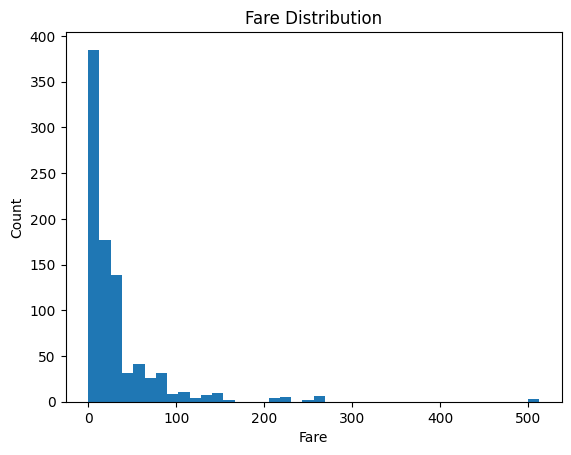

Fare is rightly skewed


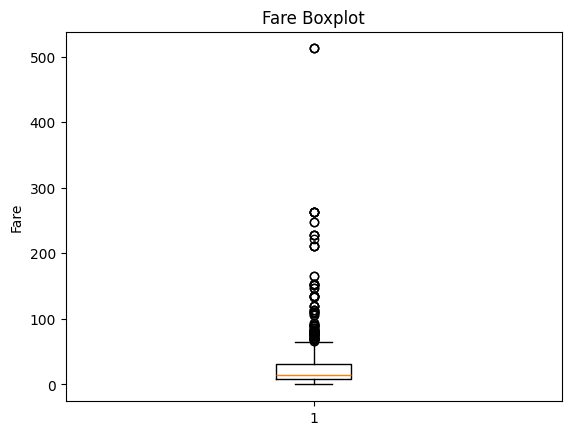

Yes there are outliers in the data
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


C:\Users\Vineet Kumar\AppData\Local\Temp\ipykernel_18096\508387098.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Fair Band")["Survived"].mean()


<Figure size 640x480 with 0 Axes>

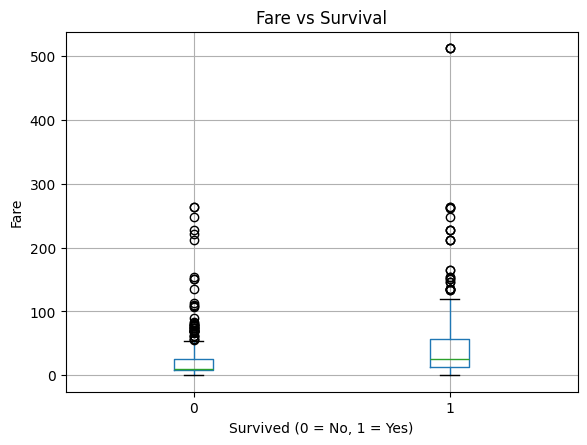

Clearly we observe that Survival Rate has increased with the fair price


In [322]:
# What is the fare distribution?
# Are fares skewed?
# Are there extreme outliers?
# Average fare of survivors vs non-survivors?
# Does higher fare imply higher survival?

print(df["Fare"].describe())

plt.figure()
plt.hist(df["Fare"], bins=40)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution")
plt.show()

print("Fare is rightly skewed")

plt.figure()
plt.boxplot(df["Fare"].dropna())
plt.ylabel("Fare")
plt.title("Fare Boxplot")
plt.show()

print("Yes there are outliers in the data")

print(df.groupby("Survived")["Fare"].mean())
#directly comparing avg for telling that higher fare implies higher survival seems suss
#so i created four bands of prices and then in each of them calculated the Survival rate
df["Fair Band"] = pd.qcut(df["Fare"], q=4)
df.groupby("Fair Band")["Survived"].mean()

plt.figure()
df.boxplot(column="Fare", by="Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.title("Fare vs Survival")
plt.suptitle("")
plt.show()

print("Clearly we observe that Survival Rate has increased with the fair price")




Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


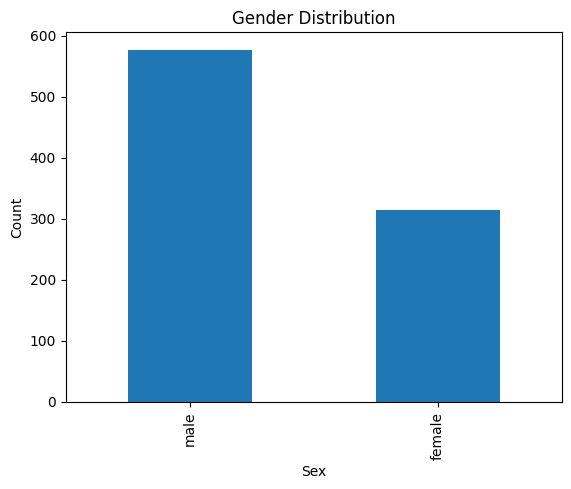

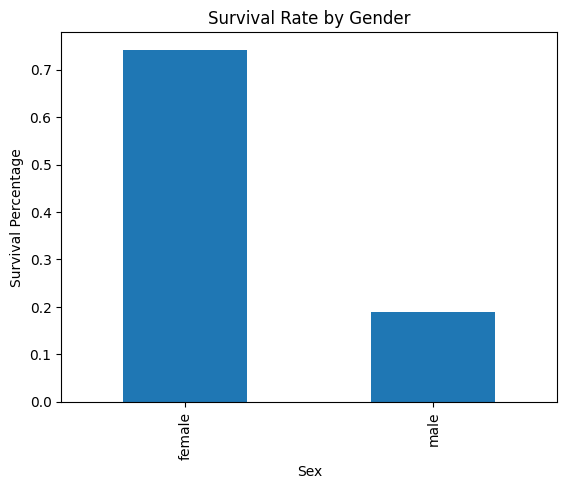

Clearly, female has higher survival rate by 0.55


In [323]:
# Sex
# Survival rate by gender?
# Absolute count vs percentage?
# Which gender survived more and by how much?

gender_survival_rate = df.groupby("Sex")["Survived"].mean()
print(gender_survival_rate)

plt.figure()
df["Sex"].value_counts().plot(kind = "bar")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

gender_survival_rate.plot(kind = "bar")
plt.ylabel("Survival Percentage")
plt.title("Survival Rate by Gender")
plt.show()

print(f"Clearly, female has higher survival rate by {gender_survival_rate.iloc[0] - gender_survival_rate.iloc[1]:.2f}")


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


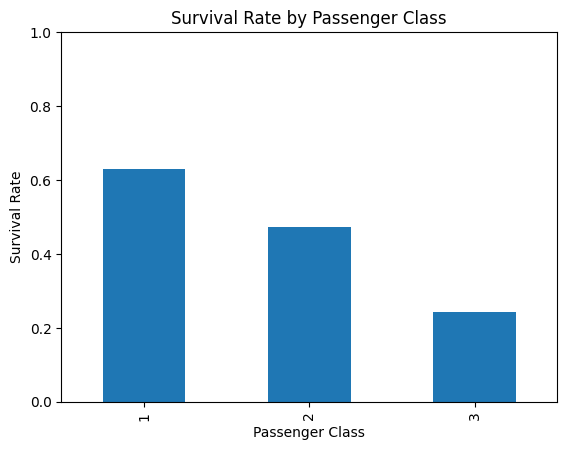

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [324]:
# Pclass
# Survival rate per class?
# Does class strongly influence survival?
# Class-wise passenger distribution?

v = df.groupby("Pclass")["Survived"].mean()
print(v)

v.plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

w = df["Pclass"].value_counts().sort_index()
print(w)


  Port  Survival Rate
0    C       0.553571
1    Q       0.389610
2    S       0.336957
  Port  Count
0    S    644
1    C    168
2    Q     77
The port having the highest survival rate is C
Number of rows with missing values: 2


Text(0, 0.5, 'Num_peoples')

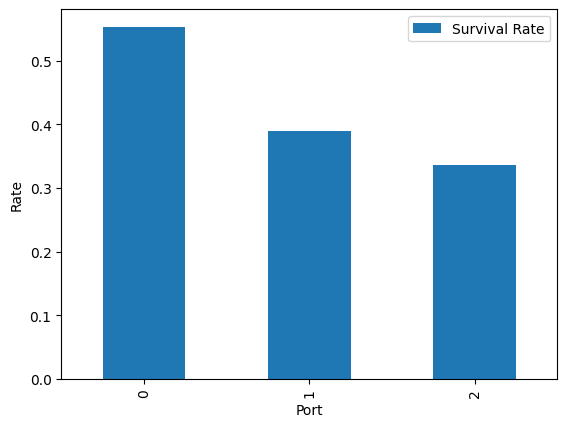

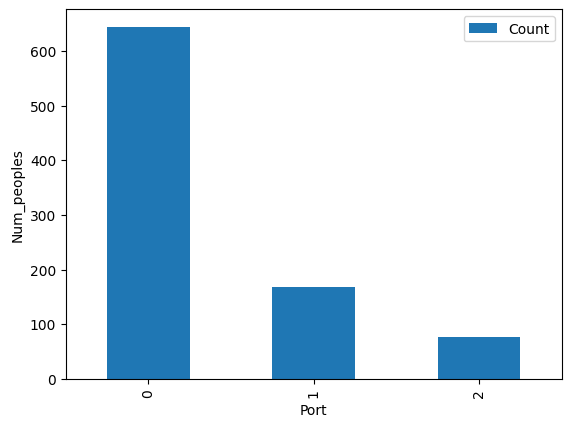

In [325]:
# Embarked
# Survival rate by port?
# Which port has highest survival?
# Are missing embarked values significant?
# Plots:
# count plot
# survival bar plot

df_embarked = pd.DataFrame(df.groupby("Embarked")["Survived"].mean()).reset_index()
df_embarked.columns = ["Port", "Survival Rate"]
print(df_embarked)

df_embarked_count = pd.DataFrame(df["Embarked"].value_counts()).reset_index()
df_embarked_count.columns = ["Port", "Count"]
print(df_embarked_count)

x = df_embarked.loc[
    df_embarked["Survival Rate"] == df_embarked["Survival Rate"].max(), "Port"
]
print(f"The port having the highest survival rate is {list(x)[0]}")

print(f"Number of rows with missing values: {df["Embarked"].isna().sum()}")

df_embarked.plot(kind = "bar")
plt.ylabel("Rate")
plt.xlabel("Port")

df_embarked_count.plot(kind = "bar")
plt.xlabel("Port")
plt.ylabel("Num_peoples")

Family Size Count
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
The number of people travelling solo are 537
Family Size Count
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64
Large family size reduces survival rate


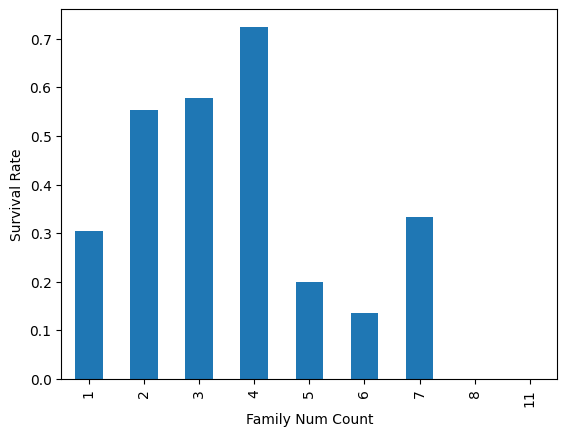

In [326]:
# SibSp & Parch
# How many passengers traveled alone?
# Survival rate for solo vs family passengers?
# Is there an optimal family size for survival?
# Does very large family size reduce survival?

df_family_size = pd.DataFrame(df[["PassengerId", "SibSp", "Parch", "Survived"]]).reset_index()
df_family_size["Family Size Count"] = df_family_size["SibSp"] + df_family_size["Parch"] + 1
print(df_family_size["Family Size Count"].value_counts())

solo_count = df_family_size[df_family_size["Family Size Count"] == 1].shape[0]
print(f"The number of people travelling solo are {solo_count}")

val = df_family_size.groupby("Family Size Count")["Survived"].mean()
print(val)

val.plot(kind = "bar")
plt.xlabel("Family Num Count")
plt.ylabel("Survival Rate")

print("Large family size reduces survival rate")

title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64
Yes titles should be grouped. The rare ones can be just named as Rare and many others could also be merged to get less number of unique titles.


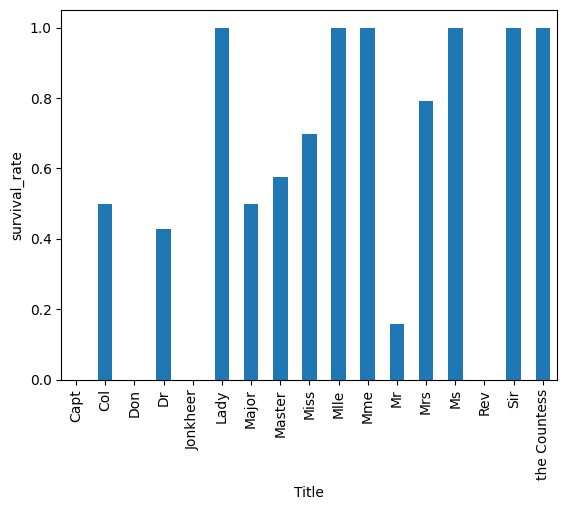

In [ ]:
# 🔹 G. Text-heavy / messy features (decision making)
# Name
# What titles exist in names?
# Survival rate by title?
# Which titles are rare?
# Should titles be grouped?
# Prints:
# extracted title counts
# survival by title

df_name = pd.DataFrame(df[["Name", "Survived"]])
df_name["title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")
value = df_name.groupby("title")["Survived"].mean()
print(value)

value.plot(kind = "bar")
plt.xlabel("Title")
plt.ylabel("survival_rate")

rare_titles = df_name["title"].value_counts()[df_name["title"].value_counts() < 10].index.tolist()
rare_titles

print("Yes titles should be grouped. The rare ones can be just named as Rare and many others could also be merged to get less number of unique titles.")

In [328]:
# Ticket
# How many unique ticket values?
# Are tickets repeated?
# Do shared tickets imply group survival?
# Is this feature worth keeping?

uniq_ticket = df["Ticket"].nunique()
print(uniq_ticket)

df["Ticket"].value_counts()[df["Ticket"].value_counts() > 1].index.shape[0]

print("Yes tickets are repeated")

df["Ticket_Group_Size"] = df.groupby("Ticket")["Ticket"].transform("count")
df.groupby("Ticket_Group_Size")["Survived"].agg(
    Count="count",
    Survival_Rate="mean"
).sort_index()

df["Ticket_Group_Bin"] = pd.cut(
    df["Ticket_Group_Size"],
    bins=[0,1,4,8,100],
    labels=["Solo","Small","Medium","Large"]
)


681
Yes tickets are repeated


77.10%
           Count  Survival_Rate
has_cabin                      
False        687       0.299854
True         204       0.666667
Cabin can be binary encoded as having or not having
From graph we observe that the ones having cabin have higher survival rate


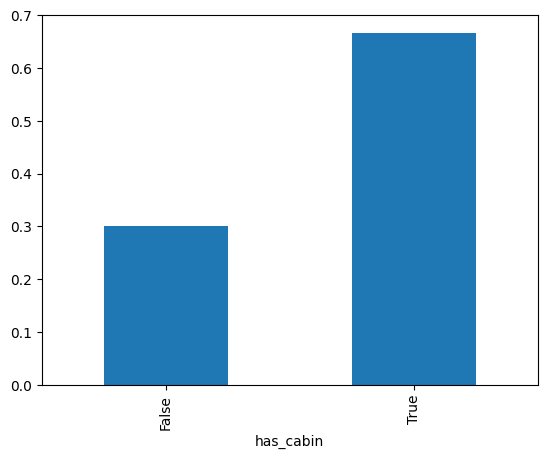

In [329]:
# Cabin
# Percentage of missing cabin values?
# Does having a cabin recorded affect survival?
# Should cabin be dropped or binary encoded?

p = df["Cabin"].isna().sum()
q = df["Cabin"].notna().sum()
missing_percentage = 100 * p / len(df)
print(f"{missing_percentage:.2f}%")

df["has_cabin"] = df["Cabin"].notna()
cabin_summary = df.groupby("has_cabin")["Survived"].agg(
    Count = "count",
    Survival_Rate = "mean"
)
print(cabin_summary)

cabin_summary["Survival_Rate"].plot(kind = "bar")

print("Cabin can be binary encoded as having or not having")
print("From graph we observe that the ones having cabin have higher survival rate")



                   Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived           1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
Pclass            -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
Age               -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
SibSp             -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
Parch              0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
Fare               0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
Family_Size_Count  0.016639  0.065997 -0.301914  0.890712  0.783111  0.217138   

                   Family_Size_Count  
Survived                    0.016639  
Pclass                      0.065997  
Age                        -0.301914  
SibSp                       0.890712  
Parch                       0.783111  
Fare                        0.217138  
Family_Size_Count           1.000000  


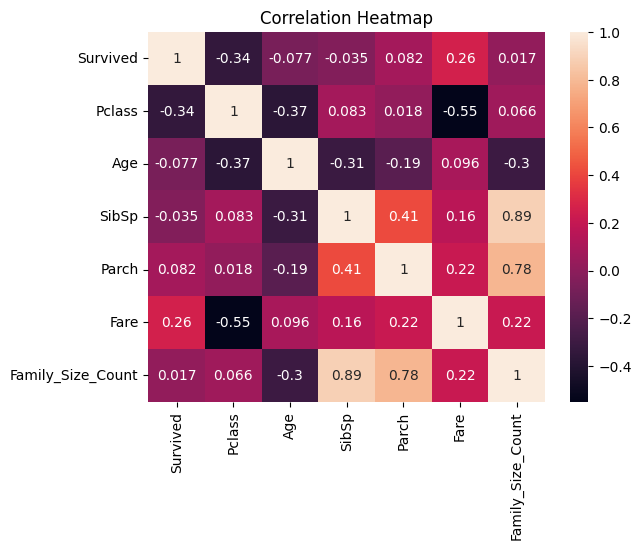

In [347]:
# 🔹 H. Correlation & relationships
# Correlation between numeric features?
# Does fare correlate with class?
# Any multicollinearity issues?
df.columns
df["Family_Size_Count"] = df["SibSp"] + df["Parch"] + 1
numeric_cols = [
    "Survived",
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Family_Size_Count"
]
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

import seaborn as sns

sns.heatmap(
    corr_matrix,
    annot=True
)
plt.title("Correlation Heatmap")
plt.show()


In [349]:
# Which columns should be dropped?
print("Sibsp, Parch can be dropped as we engineered the family size from it. Also Name, Ticket and Cabin also can be dropped.")

# Which columns need encoding?
print("Sex,Embarked,Ticket Group Bin needed encoding")

# Which columns need scaling?
print("Age, Fare needs scaling")

# Which columns need imputation?
print("Age, Fare, Family Size Count need imputation")

# Which engineered features add value?
print("has_cabin, Ticket_Group_Bin and Family_Size_Count added value")
df.columns

Sibsp, Parch can be dropped as we engineered the family size from it. Also Name, Ticket and Cabin also can be dropped.
Sex,Embarked,Ticket Group Bin needed encoding
Age, Fare needs scaling
Age, Fare, Family Size Count need imputation
has_cabin, Ticket_Group_Bin and Family_Size_Count added value


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fair Band',
       'Ticket_Group_Size', 'Ticket_Group_Bin', 'has_cabin',
       'Family_Size_Count'],
      dtype='object')